In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from stabilogram.stato import Stabilogram
from descriptors import compute_all_features

In [74]:
def load_data(foldername):
    base_path_posture = "P:/DATA_OCT_22/Expert_Eye/Dataset/gait_posture/raw_data/{}/t0/posture/"

    posture_data_files = {
        'yf_data': "2017-09-21_08_22_12_YF.txt", # Closed eyes
        'yo_data': "2017-09-21_08_22_12_YO.txt"  # Open eyes
    }

    try:
        data_posture = {}
        for name, filename in posture_data_files.items():
            path = base_path_posture.format(foldername) + filename
            data_posture[name] = pd.read_csv(path, sep="\t")

        return data_posture
    except:
        return None
    


In [95]:
data_posture = load_data('MOU002NJ')

In [96]:
yf_data = data_posture['yf_data']
yo_data = data_posture['yo_data']

In [97]:
# Lenght and width of Nintendo wii balance board
length = 53.6
width = 33.7

# Calculate total force
yf_data['TotalForce'] = (yf_data['BottomLeftCalcul_SensorsKG'] +
                         yf_data['BottomRightCalcul_SensorsKG'] +
                         yf_data['TopLeftCalcul_SensorsKG'] +
                         yf_data['TopRightCalcul_SensorsKG'])

# Calculate COP_X and COP_Y
yf_data['COP_X'] = ((yf_data['BottomLeftCalcul_SensorsKG'] +
                     yf_data['TopLeftCalcul_SensorsKG']) * width / 2 -
                    (yf_data['BottomRightCalcul_SensorsKG'] +
                     yf_data['TopRightCalcul_SensorsKG']) * width / 2) / yf_data['TotalForce']

yf_data['COP_Y'] = ((yf_data['BottomLeftCalcul_SensorsKG'] +
                     yf_data['BottomRightCalcul_SensorsKG']) * length / 2 -
                    (yf_data['TopLeftCalcul_SensorsKG'] +
                     yf_data['TopRightCalcul_SensorsKG']) * length / 2) / yf_data['TotalForce']

# Calculate the mean value of COP_X and COP_Y
mean_COP_X = yf_data['COP_X'].mean()
mean_COP_Y = yf_data['COP_Y'].mean()

# Subtract the mean from each measurement to center the trajectories
yf_data['COP_X_centered'] = yf_data['COP_X'] - mean_COP_X
yf_data['COP_Y_centered'] = yf_data['COP_Y'] - mean_COP_Y

# Save the new data to a CSV file
#yf_data.to_csv("centered_data.csv", index=False)


In [98]:
time = yf_data['TIMESTAMP'].round(2).to_numpy()
X = yf_data['COP_X_centered'].to_numpy()
Y = yf_data['COP_Y_centered'].to_numpy()
#R = np.sqrt(yf_data['COP_X_centered']**2 + yf_data['COP_Y_centered']**2)

In [99]:
X.shape


(2791,)

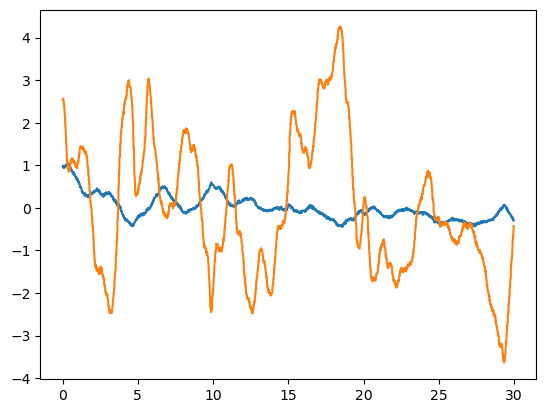

In [100]:
fig, ax = plt.subplots(1)
ax.plot(time, X)
ax.plot(time,Y)

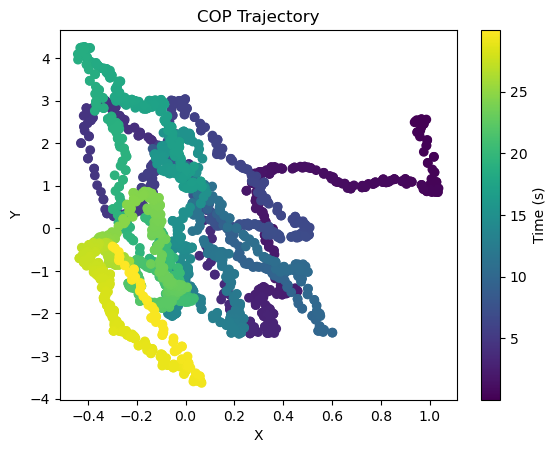

In [101]:
fig, ax = plt.subplots(1)
sc = ax.scatter(X, Y, c=time, cmap='viridis')
fig.colorbar(sc, ax=ax, label='Time (s)')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('COP Trajectory')

plt.show()

In [82]:
data = np.array([time, X, Y]).T

In [83]:
# Verif if NaN data
#valid_index = (np.sum(np.isnan(data),axis=1) == 0)

#if np.sum(valid_index) != len(data):
    #raise ValueError("Clean NaN values first")

In [84]:
stato = Stabilogram()
stato.from_array(array=data)

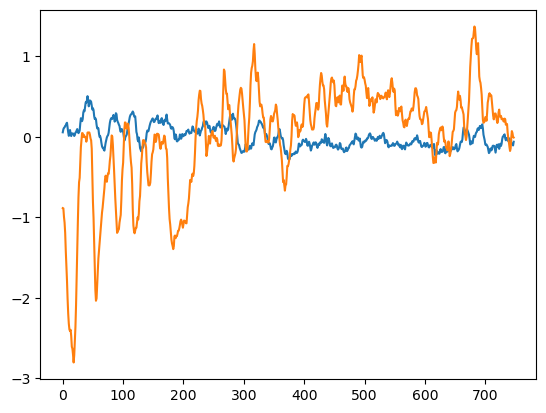

In [85]:
fig, ax = plt.subplots(1)
ax.plot(stato.medio_lateral)
ax.plot(stato.antero_posterior)

In [86]:
sway_density_radius = 0.3 # 3 mm

params_dic = {"sway_density_radius": sway_density_radius}

features = compute_all_features(stato, params_dic=params_dic)

In [87]:
features

{'mean_value_ML': array([4.47664307e-17]),
 'mean_value_AP': array([-3.97923828e-16]),
 'mean_distance_ML': 0.11552237866265924,
 'mean_distance_AP': 0.483904946994889,
 'mean_distance_Radius': 0.5243751144489438,
 'maximal_distance_ML': 0.5051035808063074,
 'maximal_distance_AP': 2.801676161978043,
 'maximal_distance_Radius': 2.801888056514116,
 'rms_ML': 0.14062235323935585,
 'rms_AP': 0.6704605465525685,
 'rms_Radius': 0.6850488965863263,
 'range_ML': 0.7854975468589777,
 'range_AP': 4.1722533551557675,
 'range_ML_AND_AP': 4.1723852803879495,
 'range_ratio_ML_AND_AP': 0.18826698189080893,
 'planar_deviation_ML_AND_AP': 0.6850488965863262,
 'coefficient_sway_direction_ML_AND_AP': -0.28752890497969946,
 'confidence_ellipse_area_ML_AND_AP': 1.7111171447974671,
 'principal_sway_direction_ML_AND_AP': 3.5952848924853145,
 'mean_velocity_ML': 0.6171211293842163,
 'mean_velocity_AP': 1.7094164325018009,
 'mean_velocity_ML_AND_AP': 1.9379555058868505,
 'sway_area_per_second_ML_AND_AP': 0.211